<a href="https://colab.research.google.com/github/Mrsth/Pandas_practice/blob/master/COVID_WORLD_CASES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



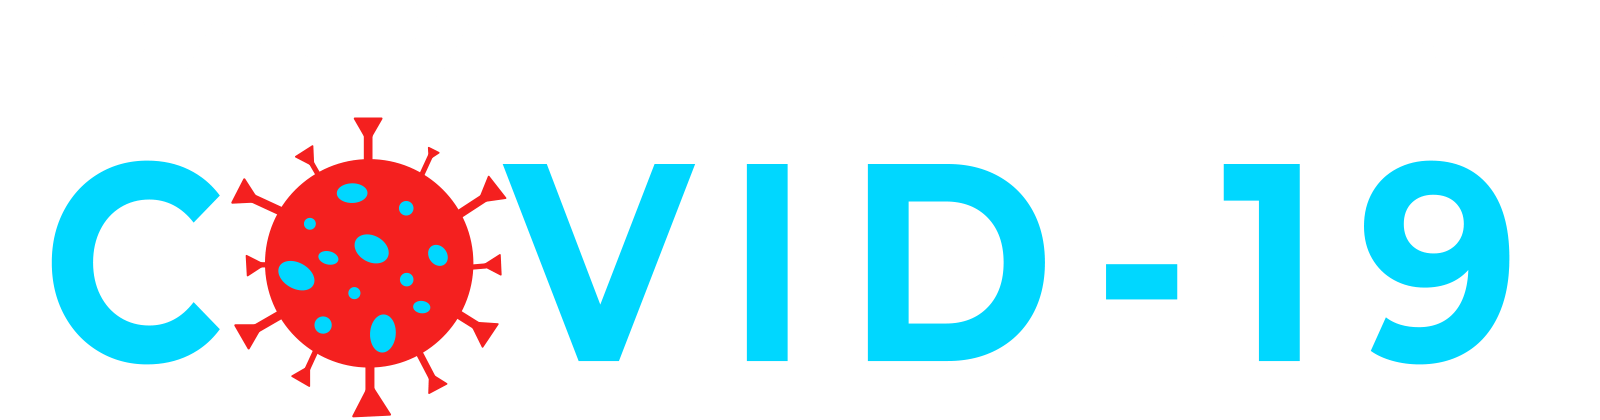



# **Analysis of COVID-19 data:**

COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.

**Most common symptoms:**

1.   Fever
2.   Dry cough

1.   List item
2.   Tiredness

**Less common symptoms:** 


1.   Aches and pains

1.   Sore throat

1.   Diarrhoea

1.   Conjunctivitis
2.   Headache

2.   Loss of taste or smell

2.   A rash on skin, or discolouration of fingers or toes

**To prevent the spread of COVID-19:**


1.   Clean your hands often. Use soap and water, or an alcohol-based hand rub.

1.   Maintain a safe distance from anyone who is coughing or sneezing.

1.   Wear a mask when physical distancing is not possible.
2.   Don’t touch your eyes, nose or mouth.

5.   Cover your nose and mouth with your bent elbow or a tissue when you cough or sneeze.

2.   Stay home if you feel unwell.
2.   If you have a fever, cough and difficulty breathing, seek medical attention.

# **Importing libraries**

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [183]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/COVID-19 data analysis/worldometer_data.csv')
df1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


# **Available columns**

In [184]:
df1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [185]:
print("Total number of columns = ",len(df1.columns))

Total number of columns =  16


# **Dataframe descriptions**

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

There are some null values available so we need to deal with it either by recovering or droping method as per requirement.

In [187]:
df1.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


# **Dealing with null values**

### Null Values -> Continent

In [188]:
df1[df1["Continent"].isna()]

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
156,Diamond Princess,NaN,NaN,712,NaN,13.0,NaN,651.0,NaN,48.0,4.0,NaN,NaN,NaN,NaN,NaN


In [189]:
df1.drop(index=[156], inplace=True)

In [190]:
df1.iloc[155:160, :]

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
155,Lesotho,Africa,2143943.0,742,NaN,23.0,NaN,175.0,NaN,544.0,NaN,346.0,11.0,8771.0,4091.0,Africa
157,San Marino,Europe,33938.0,699,NaN,42.0,NaN,657.0,NaN,0.0,NaN,20596.0,1238.0,6068.0,178797.0,Europe
158,Réunion,Africa,895952.0,671,NaN,5.0,NaN,592.0,NaN,74.0,3.0,749.0,6.0,35419.0,39532.0,NaN
159,Channel Islands,Europe,174022.0,597,NaN,47.0,NaN,533.0,NaN,17.0,NaN,3431.0,270.0,30721.0,176535.0,NaN
160,Guyana,South America,786936.0,538,NaN,22.0,NaN,189.0,NaN,327.0,2.0,684.0,28.0,5165.0,6563.0,Americas


### Null values -> Dropping columns
Newcases, NewDeath, NewRecovered, Serious,Critical,Tot Cases/1M pop, Deaths/1M pop, Tests/1M pop,WHO Region 


In [191]:
# Newcases have only 4 non-null values out of 209 entries
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    208 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        208 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       187 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    204 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       204 non-null    float64
 10  Serious,Critical  121 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [192]:
df1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [193]:
df1.drop(columns=["NewCases","NewDeaths","NewRecovered","Serious,Critical","Tot Cases/1M pop", "Deaths/1M pop", "Tests/1M pop", "WHO Region"], axis=1, inplace=True)

In [194]:
df1.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0


### Null value -> Recovery

1.   TotalDeaths (187 non null values)
2.   TotalRecovered (204 non-null values)

1.   ActiveCases (204 non-null values)
2.   Deaths/1M pop (187 non-null values)

1.   TotalTests (191 non-null values)
2.   Tests/1M pop (191 non-null values)





In [195]:
df1[df1["TotalDeaths"].isna()]

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
168,Mongolia,Asia,3283344.0,293,NaN,260.0,33.0,38334.0
169,Eritrea,Africa,3551175.0,282,NaN,225.0,57.0,NaN
172,Faeroe Islands,Europe,48882.0,266,NaN,192.0,74.0,43045.0
174,Cambodia,Asia,16741375.0,243,NaN,210.0,33.0,67807.0
177,Gibraltar,Europe,33690.0,190,NaN,184.0,6.0,23063.0
184,Seychelles,Africa,98408.0,126,NaN,124.0,2.0,NaN
186,Bhutan,Asia,772443.0,105,NaN,93.0,12.0,54589.0
190,French Polynesia,Australia/Oceania,281072.0,64,NaN,62.0,2.0,5849.0
191,St. Vincent Grenadines,North America,110976.0,56,NaN,46.0,10.0,2447.0
193,Macao,Asia,650193.0,46,NaN,46.0,0.0,4071.0


In [196]:
df1["TotalDeaths"].fillna(0, inplace=True)
df1["TotalRecovered"].fillna(0, inplace=True)
df1["ActiveCases"].fillna(0, inplace=True)
df1["TotalTests"].fillna(0, inplace=True)

In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 208
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  208 non-null    object 
 1   Continent       208 non-null    object 
 2   Population      208 non-null    float64
 3   TotalCases      208 non-null    int64  
 4   TotalDeaths     208 non-null    float64
 5   TotalRecovered  208 non-null    float64
 6   ActiveCases     208 non-null    float64
 7   TotalTests      208 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.6+ KB


# **Data visualization**

## **Total cases per continent**

In [198]:
df1.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0


In [199]:
continent_total_cases = df1.groupby(["Continent"])[["TotalCases"]].agg(["sum"])
continent_total_cases.reset_index(inplace=True)
continent_total_cases.columns = ["Continent","Sum of total cases"]
continent_total_cases

,Continent,Sum of total cases
0,Africa,1011867
1,Asia,4689794
2,Australia/Oceania,21735
3,Europe,2982576
4,North America,5919209
5,South America,4543273


In [200]:
pie_list1 = continent_total_cases["Sum of total cases"].to_numpy()
pie_list1

array([1011867, 4689794,   21735, 2982576, 5919209, 4543273])

In [201]:
pie_labels = continent_total_cases["Continent"].to_numpy()
pie_labels

array(['Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America',
       'South America'], dtype=object)

Text(0.5, 1.0, 'Pie chart of total cases per Continent')

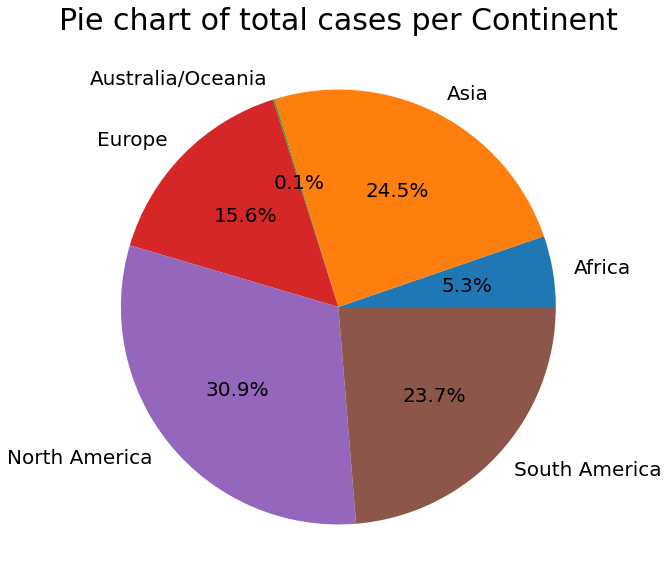

In [202]:
plt.figure(figsize=(10,10))
plt.pie(pie_list1, labels=pie_labels, textprops={"fontsize":20}, autopct="%1.1f%%")
plt.title("Pie chart of total cases per Continent", fontdict={"fontsize":30})

## **Min, Max ,and Averages per continent**

In [203]:
df1.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0


In [204]:
min_max_avg = df1.groupby(["Continent"])[["TotalCases","TotalDeaths","TotalRecovered","ActiveCases","TotalTests"]].agg(["min","max","mean"])
min_max_avg.reset_index(inplace=True)
min_max_avg.columns = ["Continent","TotalCases Min","TotalCases Max", "TotalCases Average",
                       "TotalDeaths Min", "TotalDeaths Max", "TotalDeaths Average",
                       "TotalRecovered Min", "TotalRecovered Max", "TotalRecovered Average",
                       "ActiveCases Min", "ActiveCases Max", "ActiveCases Average",
                       "TotalTests Min", "TotalTests Max", "TotalTests Average"
                       ]
min_max_avg                       

,Continent,TotalCases Min,TotalCases Max,TotalCases Average,TotalDeaths Min,TotalDeaths Max,TotalDeaths Average,TotalRecovered Min,TotalRecovered Max,TotalRecovered Average,ActiveCases Min,ActiveCases Max,ActiveCases Average,TotalTests Min,TotalTests Max,TotalTests Average
0,Africa,10,538184,17752.052632,0.0,9604.0,387.964912,8.0,387316.0,12168.771930,0.0,141264.0,5195.315789,0.0,3149807.0,1.521729e+05
1,Asia,20,2025409,97704.041667,0.0,41638.0,2096.395833,19.0,1377384.0,73086.875000,0.0,606387.0,22520.770833,0.0,22149351.0,1.361538e+06
2,Australia/Oceania,22,19890,3622.500000,0.0,255.0,46.833333,18.0,10941.0,2103.333333,0.0,8694.0,1472.333333,5849.0,4631419.0,8.588018e+05
3,Europe,12,871894,62137.000000,0.0,46413.0,4275.666667,0.0,676357.0,33068.791667,0.0,180931.0,9901.270833,0.0,29716907.0,2.002617e+06
4,North America,13,5032179,169120.257143,0.0,162804.0,6567.285714,7.0,2576668.0,90047.942857,0.0,2292707.0,72505.028571,0.0,63139605.0,2.004960e+06
5,South America,13,2917562,324519.500000,0.0,98644.0,11063.214286,13.0,2047660.0,222582.142857,0.0,771258.0,90874.142857,1816.0,13206188.0,1.598544e+06


In [205]:
TC_MIN = min_max_avg["TotalCases Min"].to_numpy()
TC_MAX = min_max_avg["TotalCases Max"].to_numpy()
TC_AVG = min_max_avg["TotalCases Average"].to_numpy()

TD_MIN = min_max_avg["TotalDeaths Min"].to_numpy()
TD_MAX = min_max_avg["TotalDeaths Max"].to_numpy()
TD_AVG = min_max_avg["TotalDeaths Average"].to_numpy()

TR_MIN = min_max_avg["TotalRecovered Min"].to_numpy()
TR_MAX = min_max_avg["TotalRecovered Max"].to_numpy()
TR_AVG = min_max_avg["TotalRecovered Average"].to_numpy()

ACT_MIN = min_max_avg["ActiveCases Min"].to_numpy()
ACT_MAX = min_max_avg["ActiveCases Max"].to_numpy()
ACT_AVG = min_max_avg["ActiveCases Average"].to_numpy()

TT_MIN = min_max_avg["TotalTests Min"].to_numpy()
TT_MAX = min_max_avg["TotalTests Max"].to_numpy()
TT_AVG = min_max_avg["TotalTests Average"].to_numpy()

PIE_LABELS = min_max_avg["Continent"].to_numpy()

Text(0.5, 1.0, 'Average Total cases')

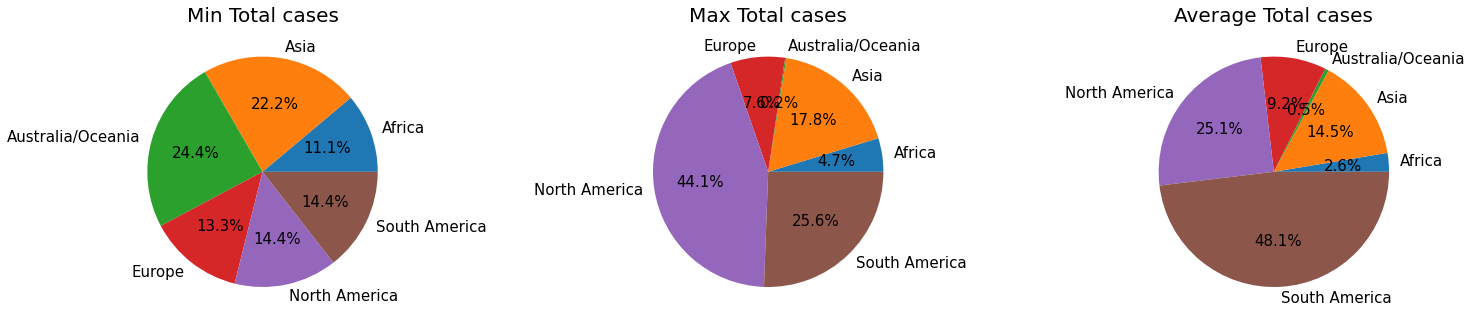

In [206]:
fig,(ax1,ax2, ax3) = plt.subplots(1,3)
plt.subplots_adjust(left=0.5, right=4, bottom=1, top=2, wspace=0.01, hspace=0.01)

ax1.pie(TC_MIN, labels=PIE_LABELS,textprops={'fontsize':15}, autopct="%1.1f%%")
ax1.set_title("Min Total cases", fontdict={'fontsize':20})

ax2.pie(TC_MAX, labels=PIE_LABELS, textprops={'fontsize':15}, autopct="%1.1f%%")
ax2.set_title("Max Total cases", fontdict={'fontsize':20})

ax3.pie(TC_AVG, labels=PIE_LABELS, textprops={'fontsize':15}, autopct="%1.1f%%")
ax3.set_title("Average Total cases", fontdict={'fontsize':20})

In [207]:
class figure_class:

  def __init__(self, TC_MIN, TC_MAX, TC_AVG, TD_MIN, TD_MAX, TD_AVG, TR_MIN, TR_MAX, TR_AVG, ACT_MIN,ACT_MAX, ACT_AVG, TT_MIN, TT_MAX, TT_AVG, PIE_LABELS):
    self.TC_MIN = TC_MIN
    self.TC_MAX = TC_MAX
    self.TC_AVG = TC_AVG

    self.TD_MIN = TD_MIN
    self.TD_MAX = TD_MAX
    self.TD_AVG = TD_AVG

    self.TR_MIN = TR_MIN
    self.TR_MAX = TR_MAX
    self.TR_AVG = TR_AVG

    self.ACT_MIN = ACT_MIN
    self.ACT_MAX = ACT_MAX
    self.ACT_AVG = ACT_AVG

    self.TT_MIN = TT_MIN
    self.TT_MAX = TT_MAX
    self.TT_AVG = TT_AVG

    self.PIE_LABELS = PIE_LABELS

  def graph_method(self):
    fig, axes = plt.subplots(5,3)
    plt.subplots_adjust(left=0.5, right=5, bottom=2, top=10, wspace=0.001, hspace=0.2)
    #######################################################################################
    # ------------------------TOTAL CASES-------------------------------------------------
    axes[0,0].pie(self.TC_MIN, textprops={'fontsize':15},autopct="%1.1f%%")
    axes[0,0].set_title("Min Total cases", fontdict={'fontsize':25})
    axes[0,0].legend(self.PIE_LABELS, fontsize=15, loc=0)

    axes[0,1].pie(self.TC_MAX, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[0,1].set_title("Max Total cases", fontdict={'fontsize':25})
    axes[0,1].legend(self.PIE_LABELS, fontsize=15, loc=0)

    axes[0,2].pie(self.TC_AVG, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[0,2].set_title("Average Total cases", fontdict={'fontsize':25})
    axes[0,2].legend(self.PIE_LABELS, fontsize=15, loc=0)
    #######################################################################################
    #---------------------------TOTAL DEATH------------------------------------------------
    axes[1,0].pie(self.TD_MIN, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[1,0].set_title("Min Total Death", fontdict={'fontsize':25})
    axes[1,0].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[1,1].pie(self.TD_MAX, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[1,1].set_title("Max Total Deaths", fontdict={'fontsize':25} )
    axes[1,1].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[1,2].pie(self.TD_AVG, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[1,2].set_title("Average Total Deaths", fontdict={'fontsize':25})
    axes[1,2].legend(self.PIE_LABELS,fontsize=15,loc=0)
    ########################################################################################
    #---------------------------TOTAL RECOVERY----------------------------------------------
    axes[2,0].pie(self.TR_MIN, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[2,0].set_title("Min Total Recovered", fontdict={'fontsize':25})
    axes[2,0].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[2,1].pie(self.TR_MAX, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[2,1].set_title("Max Total Recovered", fontdict={'fontsize':25})
    axes[2,1].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[2,2].pie(self.TR_AVG, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[2,2].set_title("Average Total Recovered", fontdict={'fontsize':25})
    axes[2,2].legend(self.PIE_LABELS,fontsize=15,loc=0)
    ########################################################################################
    #--------------------------TOTAL ACTIVE CASES------------------------------------------
    axes[3,0].pie(self.ACT_MIN, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[3,0].set_title("Min Active Cases", fontdict={'fontsize':25})
    axes[3,0].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[3,1].pie(self.ACT_MAX, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[3,1].set_title("Max Active Cases", fontdict={'fontsize':25})
    axes[3,1].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[3,2].pie(self.ACT_AVG, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[3,2].set_title("Average Active Cases", fontdict={'fontsize':25})
    axes[3,2].legend(self.PIE_LABELS,fontsize=15,loc=0)

    ########################################################################################
    #--------------------------TOTAL TEST --------------------------------------------------
    axes[4,0].pie(self.TT_MIN, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[4,0].set_title("Min Total Tests", fontdict={'fontsize':25})
    axes[4,0].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[4,1].pie(self.TT_MAX, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[4,1].set_title("Max Total Tests", fontdict={'fontsize':25})
    axes[4,1].legend(self.PIE_LABELS,fontsize=15,loc=0)

    axes[4,2].pie(self.TT_AVG, textprops={'fontsize':15}, autopct="%1.1f%%")
    axes[4,2].set_title("Average Total Tests", fontdict={'fontsize':25})
    axes[4,2].legend(self.PIE_LABELS,fontsize=15,loc=0)


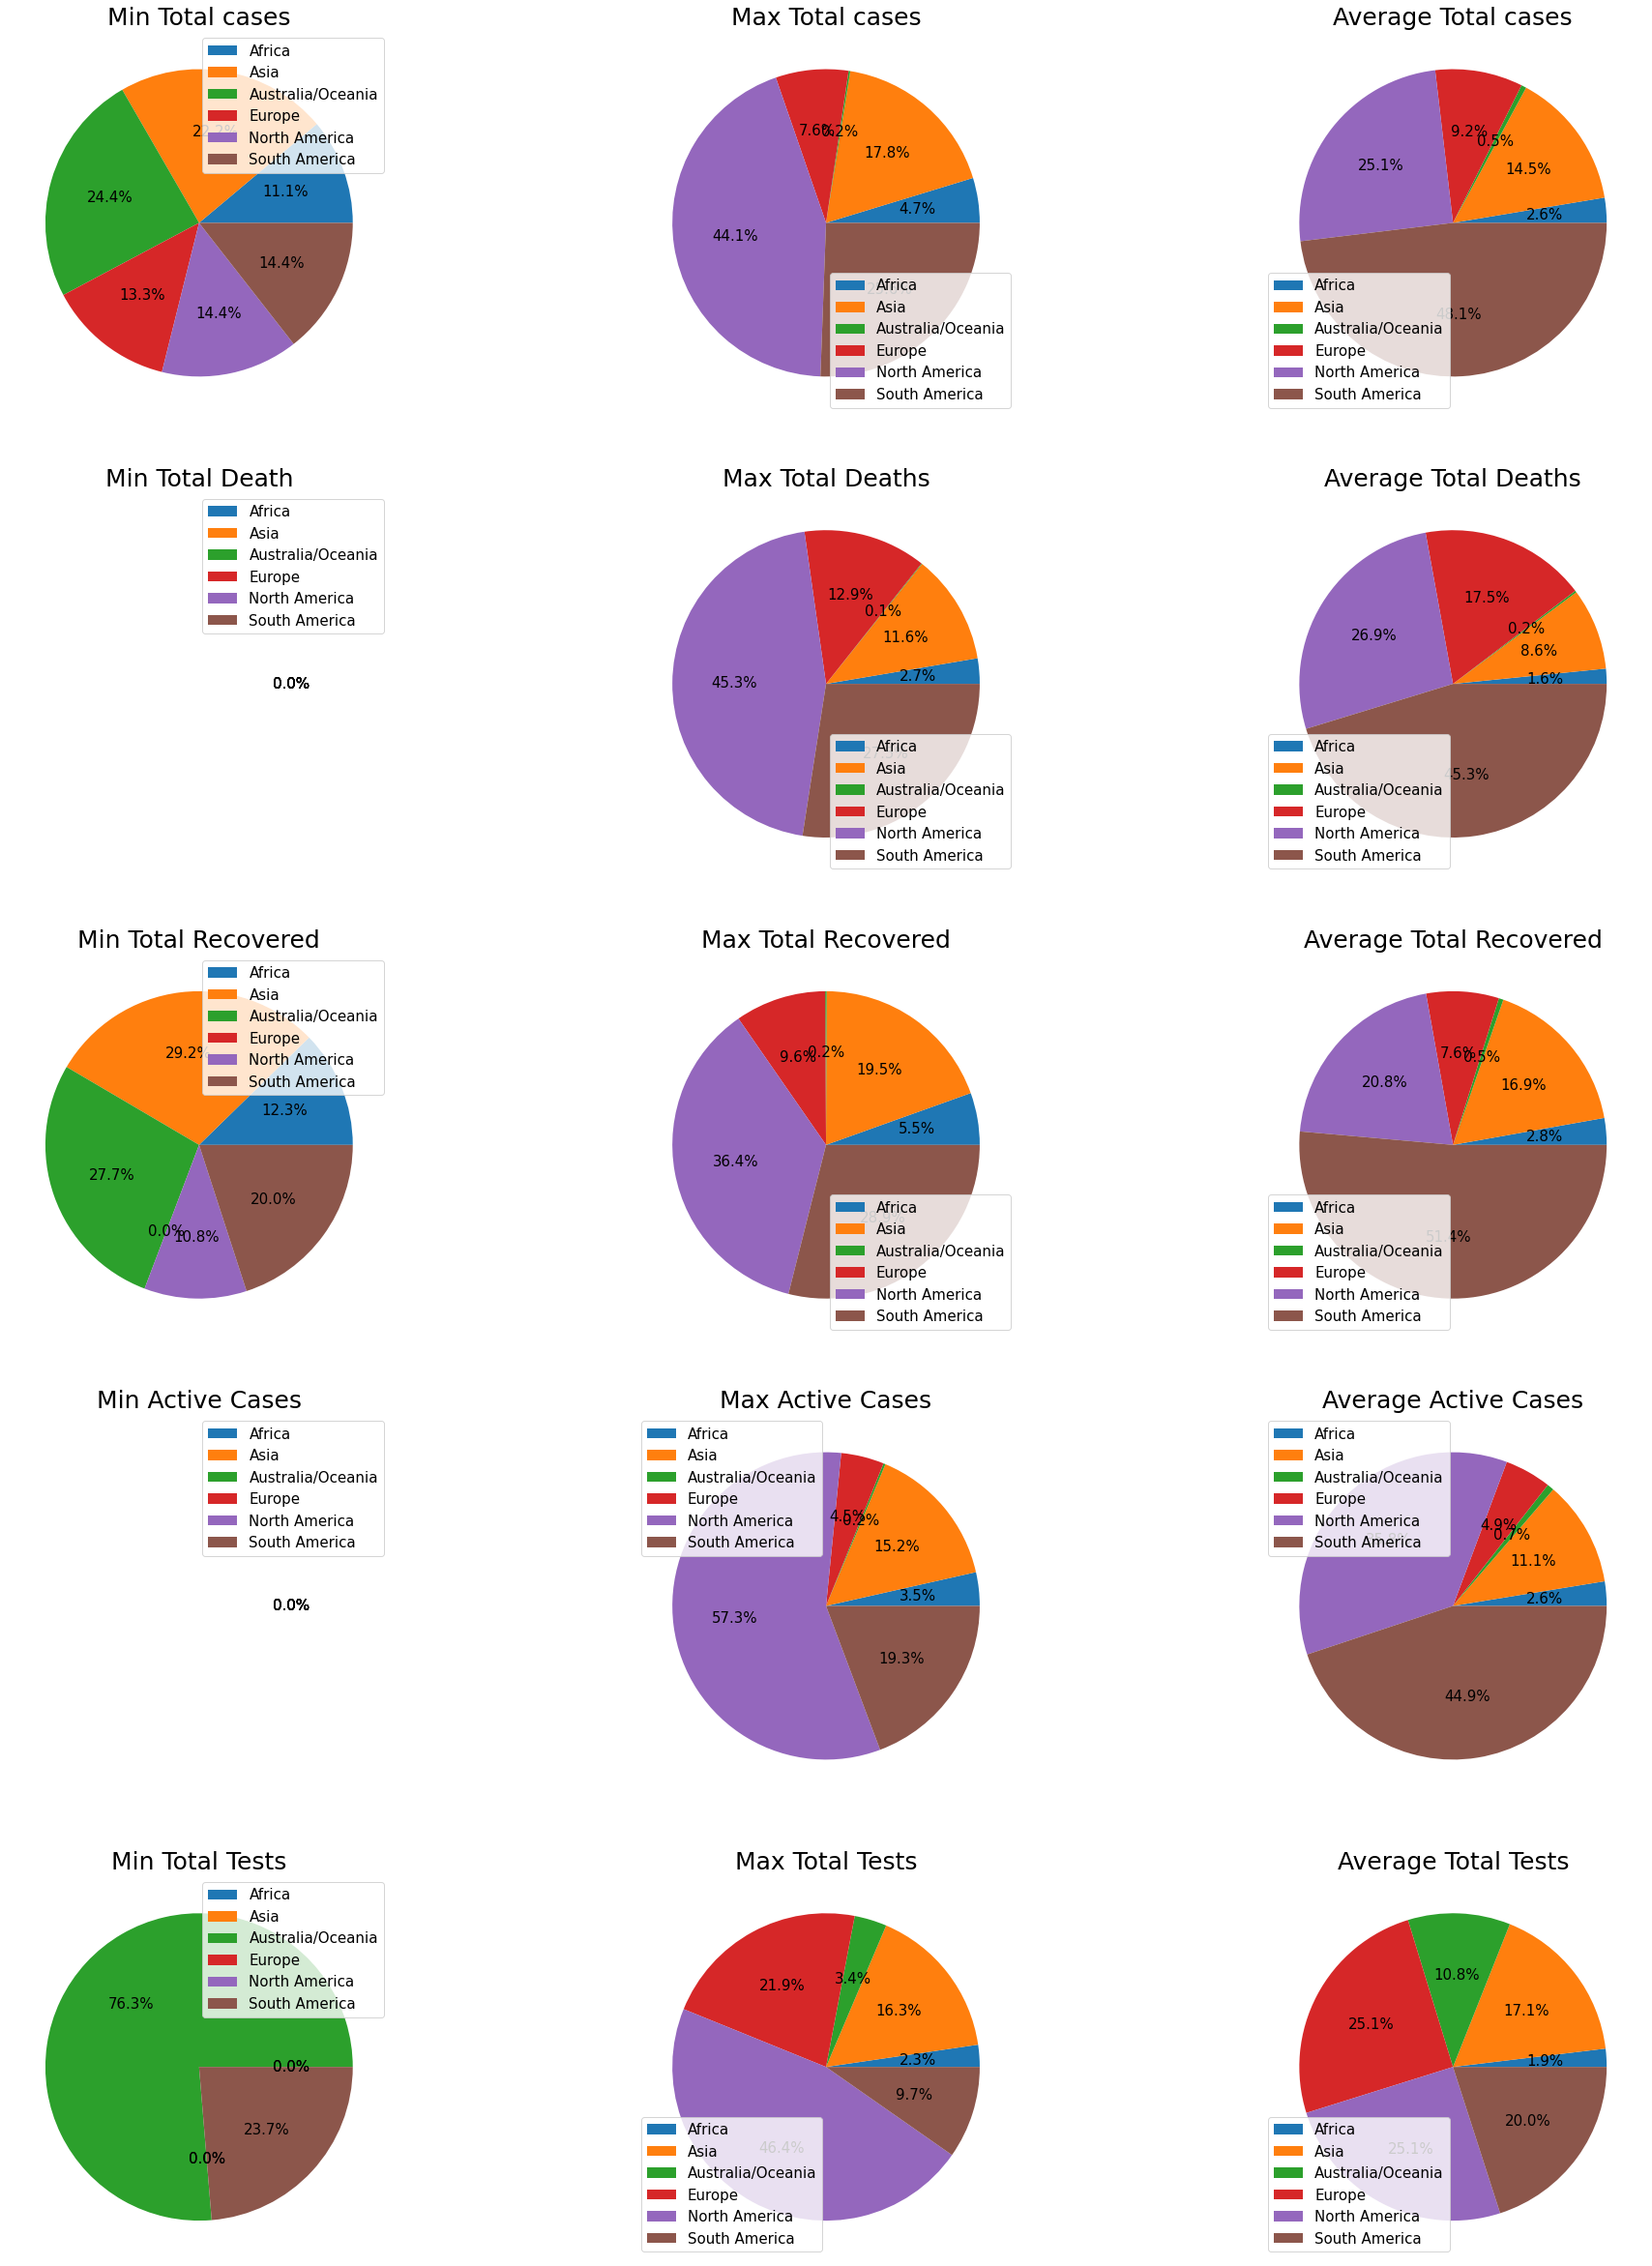

In [208]:
graph1 = figure_class(TC_MIN, TC_MAX, TC_AVG, TD_MIN, TD_MAX, TD_AVG, TR_MIN, TR_MAX, TR_AVG, ACT_MIN,ACT_MAX, ACT_AVG, TT_MIN, TT_MAX, TT_AVG, PIE_LABELS)
graph1.graph_method()

In [209]:
df1.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0


In [210]:
min_max_avg.head()

,Continent,TotalCases Min,TotalCases Max,TotalCases Average,TotalDeaths Min,TotalDeaths Max,TotalDeaths Average,TotalRecovered Min,TotalRecovered Max,TotalRecovered Average,ActiveCases Min,ActiveCases Max,ActiveCases Average,TotalTests Min,TotalTests Max,TotalTests Average
0,Africa,10,538184,17752.052632,0.0,9604.0,387.964912,8.0,387316.0,12168.771930,0.0,141264.0,5195.315789,0.0,3149807.0,1.521729e+05
1,Asia,20,2025409,97704.041667,0.0,41638.0,2096.395833,19.0,1377384.0,73086.875000,0.0,606387.0,22520.770833,0.0,22149351.0,1.361538e+06
2,Australia/Oceania,22,19890,3622.500000,0.0,255.0,46.833333,18.0,10941.0,2103.333333,0.0,8694.0,1472.333333,5849.0,4631419.0,8.588018e+05
3,Europe,12,871894,62137.000000,0.0,46413.0,4275.666667,0.0,676357.0,33068.791667,0.0,180931.0,9901.270833,0.0,29716907.0,2.002617e+06
4,North America,13,5032179,169120.257143,0.0,162804.0,6567.285714,7.0,2576668.0,90047.942857,0.0,2292707.0,72505.028571,0.0,63139605.0,2.004960e+06


# **Comparing min, max, and average of two countries interms of:**


1.   Total cases
2.   Total deaths

1.   Total recovary
2.   Active cases

1.  Total tests







In [234]:
country_input = (input("Please select a country: "))
flag1 = df1[df1["Country/Region"].isin([country_input])]["Country/Region"].to_numpy()

country_input1 = (input("Please select another country: "))
flag2 = df1[df1["Country/Region"].isin([country_input1])]["Country/Region"].to_numpy()

if (flag1 == country_input) & (flag2 == country_input1):
  print("You selected {} and {}".format(flag1[0],flag2[0]))
  two_country = df1.loc[ (df1["Country/Region"]== flag1[0]) | (df1["Country/Region"]== flag2[0])]
else:
  print("{} Country1 {} Country2 not found.".format(country_input, country_input1))

Please select a country: Germany
Please select another country: France
You selected Germany and France


In [235]:
two_country

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
18,Germany,Europe,83811260.0,215210,9252.0,196200.0,9758.0,8586648.0
19,France,Europe,65288306.0,195633,30312.0,82460.0,82861.0,3992206.0


In [236]:
two_country_groupby = two_country.groupby(["Country/Region"])[["TotalCases","TotalDeaths","TotalRecovered","ActiveCases","TotalTests"]].agg(["min","max","mean"])
two_country_groupby

TotalCases                  ... TotalTests                      
                      min     max    mean  ...        min        max       mean
Country/Region                             ...                                 
France             195633  195633  195633  ...  3992206.0  3992206.0  3992206.0
Germany            215210  215210  215210  ...  8586648.0  8586648.0  8586648.0

[2 rows x 15 columns]

In [237]:
two_country_groupby.reset_index()

Country/Region TotalCases          ... TotalTests                      
                        min     max  ...        min        max       mean
0         France     195633  195633  ...  3992206.0  3992206.0  3992206.0
1        Germany     215210  215210  ...  8586648.0  8586648.0  8586648.0

[2 rows x 16 columns]

In [238]:
two_country_groupby.columns = ["TotalCases Min","TotalCases Max", "TotalCases Average",
                       "TotalDeaths Min", "TotalDeaths Max", "TotalDeaths Average",
                       "TotalRecovered Min", "TotalRecovered Max", "TotalRecovered Average",
                       "ActiveCases Min", "ActiveCases Max", "ActiveCases Average",
                       "TotalTests Min", "TotalTests Max", "TotalTests Average"
                       ]
two_country_groupby                       

,TotalCases Min,TotalCases Max,TotalCases Average,TotalDeaths Min,TotalDeaths Max,TotalDeaths Average,TotalRecovered Min,TotalRecovered Max,TotalRecovered Average,ActiveCases Min,ActiveCases Max,ActiveCases Average,TotalTests Min,TotalTests Max,TotalTests Average
Country/Region,,,,,,,,,,,,,,,
France,195633,195633,195633,30312.0,30312.0,30312.0,82460.0,82460.0,82460.0,82861.0,82861.0,82861.0,3992206.0,3992206.0,3992206.0
Germany,215210,215210,215210,9252.0,9252.0,9252.0,196200.0,196200.0,196200.0,9758.0,9758.0,9758.0,8586648.0,8586648.0,8586648.0


In [239]:
TWO_COUNTRY_TC_MIN = two_country_groupby["TotalCases Min"].to_numpy()
TWO_COUNTRY_TC_MAX = two_country_groupby["TotalCases Max"].to_numpy()
TWO_COUNTRY_TC_AVG = two_country_groupby["TotalCases Average"].to_numpy()

TWO_COUNTRY_TD_MIN = two_country_groupby["TotalDeaths Min"].to_numpy()
TWO_COUNTRY_TD_MAX = two_country_groupby["TotalDeaths Max"].to_numpy()
TWO_COUNTRY_TD_AVG = two_country_groupby["TotalDeaths Average"].to_numpy()

TWO_COUNTRY_TR_MIN = two_country_groupby["TotalRecovered Min"].to_numpy()
TWO_COUNTRY_TR_MAX = two_country_groupby["TotalRecovered Max"].to_numpy()
TWO_COUNTRY_TR_AVG = two_country_groupby["TotalRecovered Average"].to_numpy()

TWO_COUNTRY_ACT_MIN = two_country_groupby["ActiveCases Min"].to_numpy()
TWO_COUNTRY_ACT_MAX = two_country_groupby["ActiveCases Max"].to_numpy()
TWO_COUNTRY_ACT_AVG = two_country_groupby["ActiveCases Average"].to_numpy()

TWO_COUNTRY_TT_MIN = two_country_groupby["TotalTests Min"].to_numpy()
TWO_COUNTRY_TT_MAX = two_country_groupby["TotalTests Max"].to_numpy()
TWO_COUNTRY_TT_AVG = two_country_groupby["TotalTests Average"].to_numpy()

TWO_COUNTRY_PIE_LABELS = np.array([flag1[0], flag2[0]], dtype='str')
TWO_COUNTRY_PIE_LABELS

array(['Germany', 'France'], dtype='<U7')

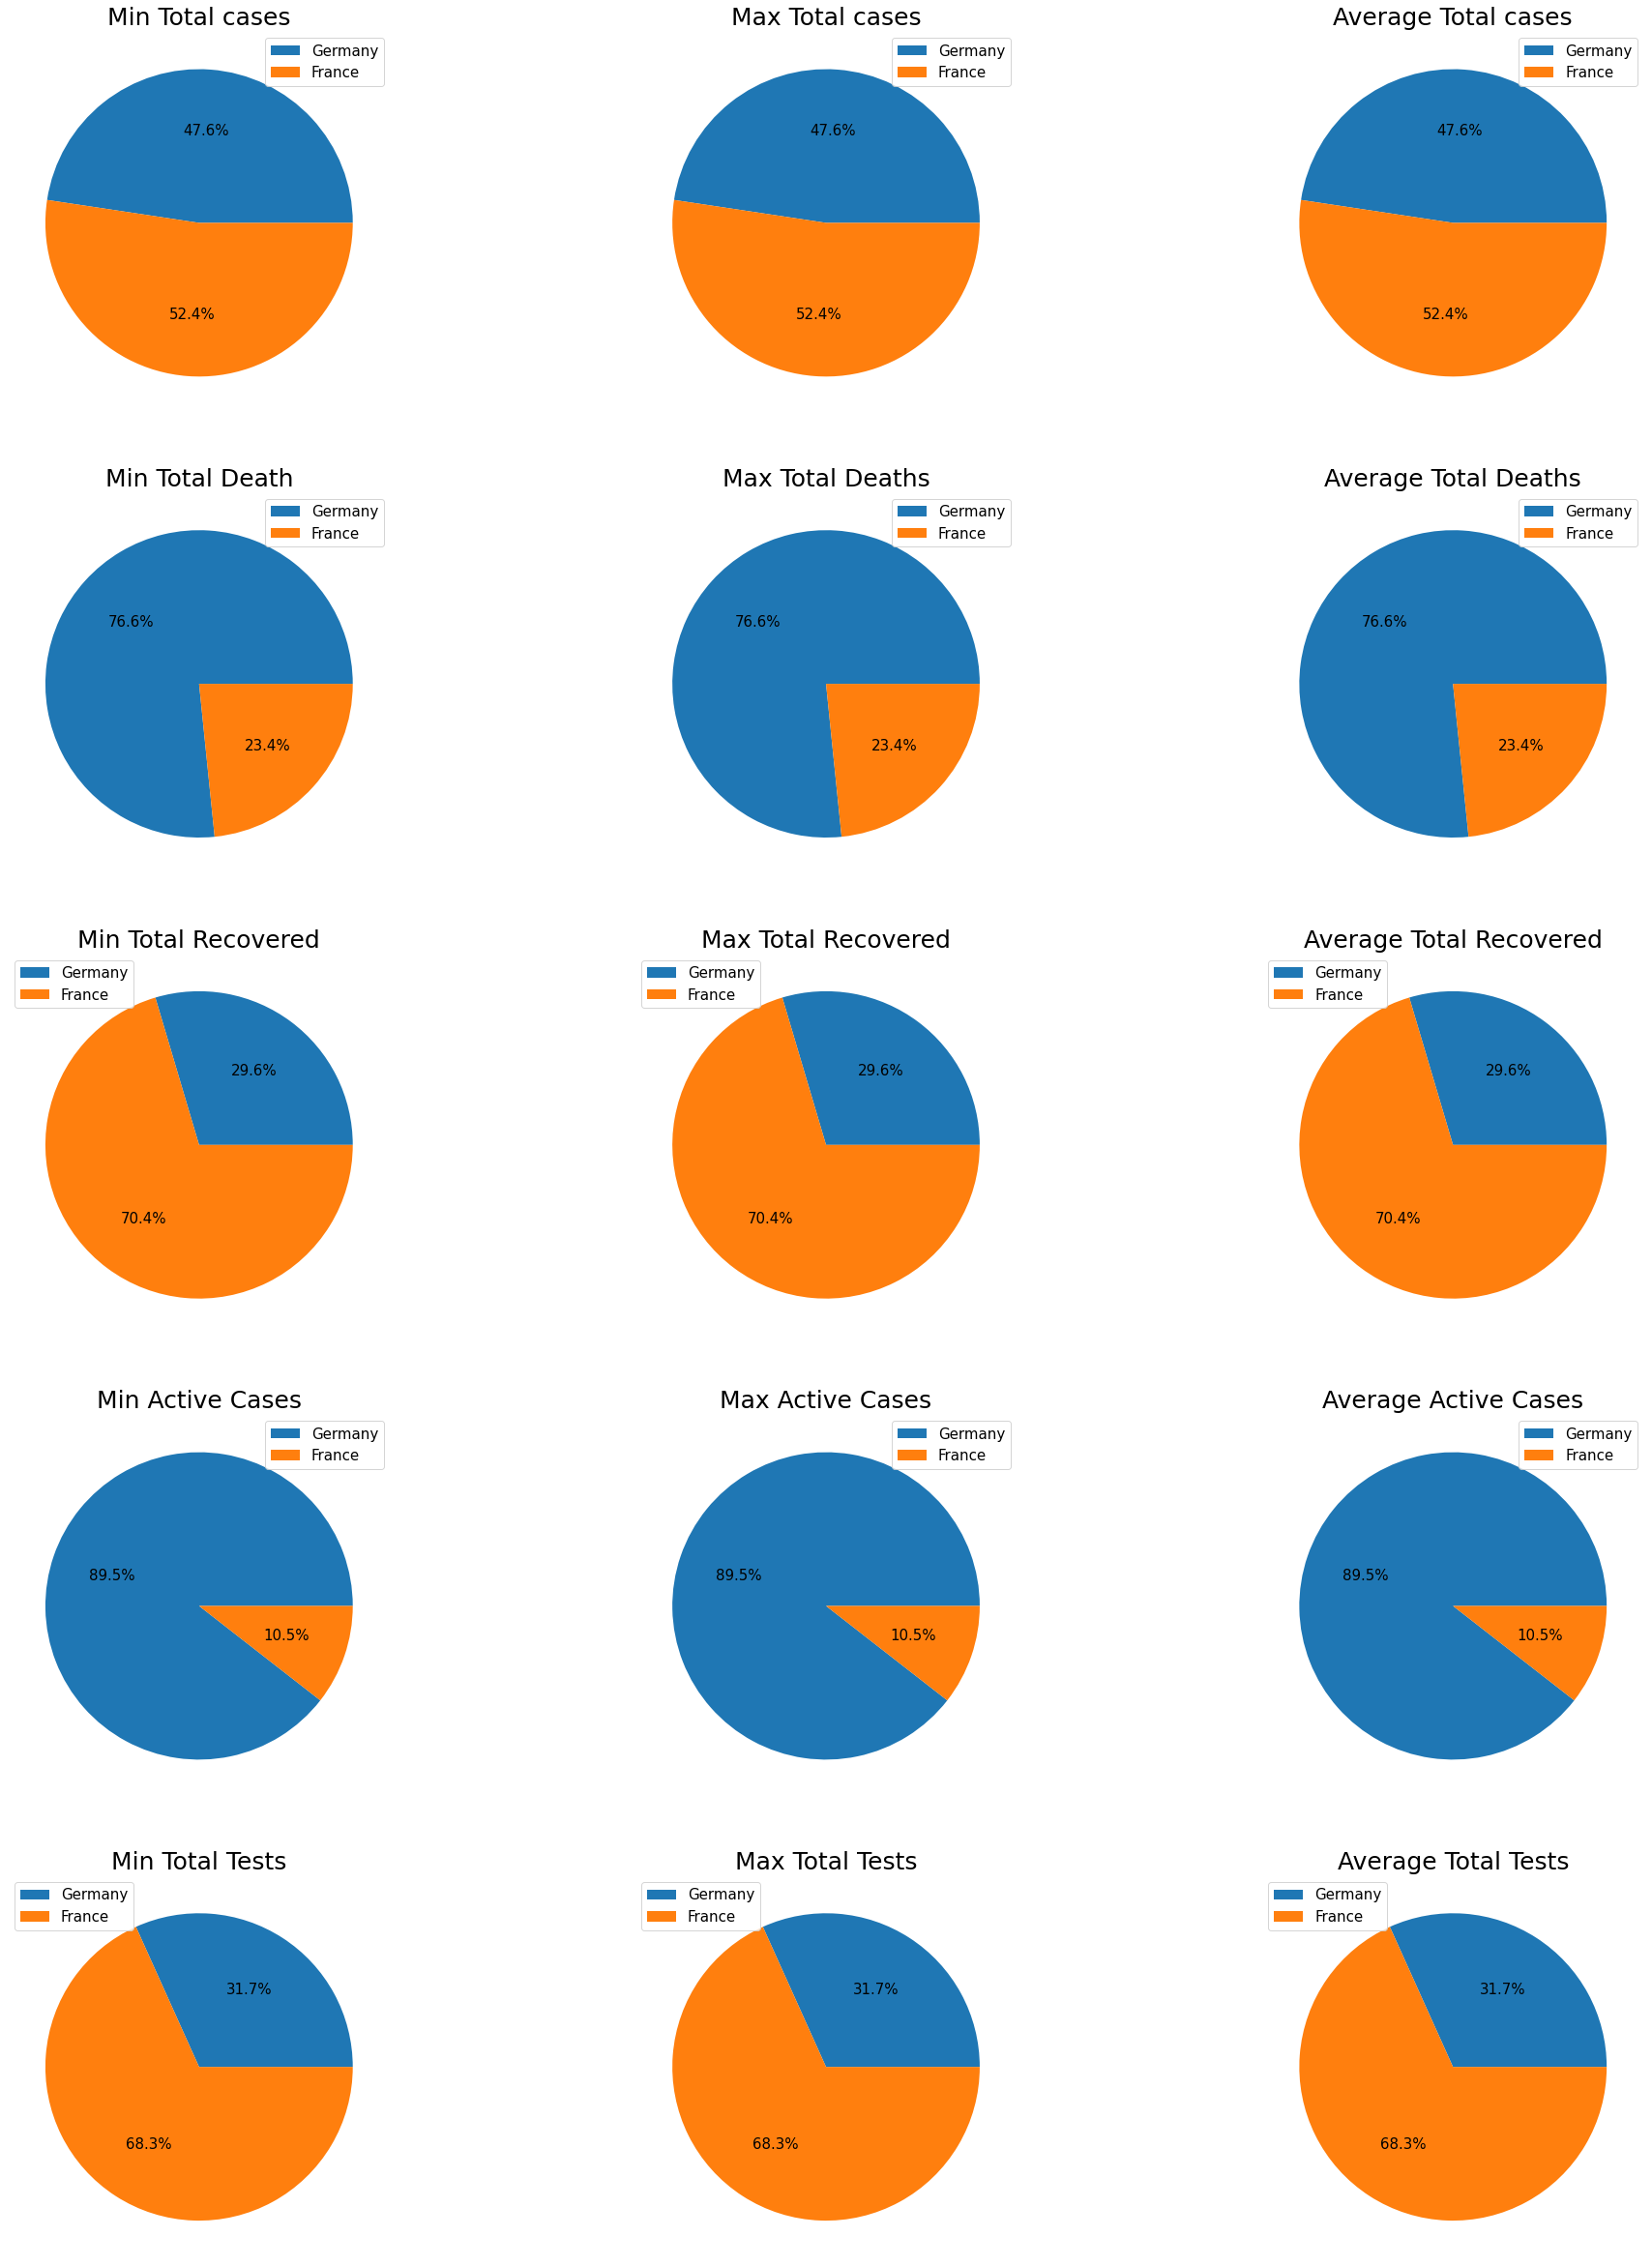

In [240]:
graph2 = figure_class(TWO_COUNTRY_TC_MIN, TWO_COUNTRY_TC_MAX, TWO_COUNTRY_TC_AVG,
                      TWO_COUNTRY_TD_MIN, TWO_COUNTRY_TD_MAX, TWO_COUNTRY_TD_AVG, 
                      TWO_COUNTRY_TR_MIN, TWO_COUNTRY_TR_MAX, TWO_COUNTRY_TR_AVG,
                      TWO_COUNTRY_ACT_MIN, TWO_COUNTRY_ACT_MAX, TWO_COUNTRY_ACT_AVG,
                      TWO_COUNTRY_TT_MIN, TWO_COUNTRY_TT_MAX, TWO_COUNTRY_TT_AVG,
                      TWO_COUNTRY_PIE_LABELS)
graph2.graph_method()